## This file is created to plot the 3D figures of the article "GNN graph structures in network anomaly detection" (NOMS 2025)

In [1]:
#imports
import os
import random
import numpy as np
import pandas as pd
from timeit import default_timer as timer
import time
import re
import Tools_first_step as tfs

import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

pd.options.mode.chained_assignment = None

In [2]:
#loading data set
df=pd.read_csv('/home/student/Documents/Data/cisco/preprocessed_cisco_train.csv')
#pd.read_csv('/home/student/Documents/Data/Training_Set_Day_1/dataset_end_total_preprocessed.csv') #no more delimiter to change after this preprocessing
columns=df.columns
dataset="cisco"

In [3]:
def rmv_Unnamed(columns):

    str_remove_go="Unnamed"+".*"
    regex_str=re.compile(str_remove_go)
    not_good_col=list(filter(regex_str.match, columns))
    col_keeper=[]
    for i in columns:
        if i not in not_good_col:
            col_keeper.append(i)
        
    new_list=list(col_keeper)

    return new_list

col_to_keep=rmv_Unnamed(df.columns)

df=df[col_to_keep]
print(df.shape)

(968901, 94)


In [7]:
name_columns = df.columns
size_mode=25

In [8]:
from gensim.models import Word2Vec

def dimentionality():
    dim = []
    x = []
    

    for i in range(3, size_mode+4):
        model = Word2Vec(sentences = tfs.split_all(name_columns,dt=dataset), vector_size= i, window=5, min_count=1, workers=4, epochs=50)
        #vector_size = 25, min_count=1, workers = 4)
        dim.append(model)
        x.append(model.vector_size)
    for i in range(len(dim)):
        model = dim[i]
        vectors = model.wv
        dim.append(vectors)

    return dim, x 
        
                   

In [9]:
my_dimention= dimentionality()
print(my_dimention)

([<gensim.models.word2vec.Word2Vec object at 0x7f3fe02e0550>, <gensim.models.word2vec.Word2Vec object at 0x7f3fadaddcd0>, <gensim.models.word2vec.Word2Vec object at 0x7f3f69b6f0d0>, <gensim.models.word2vec.Word2Vec object at 0x7f3fe04924c0>, <gensim.models.word2vec.Word2Vec object at 0x7f3f697c0fd0>, <gensim.models.word2vec.Word2Vec object at 0x7f3f697c6070>, <gensim.models.word2vec.Word2Vec object at 0x7f3f6992fc10>, <gensim.models.word2vec.Word2Vec object at 0x7f3f9548fb80>, <gensim.models.word2vec.Word2Vec object at 0x7f3f9548f850>, <gensim.models.word2vec.Word2Vec object at 0x7f3f9548fc70>, <gensim.models.word2vec.Word2Vec object at 0x7f3f9548fdc0>, <gensim.models.word2vec.Word2Vec object at 0x7f3f9548fd00>, <gensim.models.word2vec.Word2Vec object at 0x7f3f9548ffa0>, <gensim.models.word2vec.Word2Vec object at 0x7f3f9548faf0>, <gensim.models.word2vec.Word2Vec object at 0x7f3f9548f820>, <gensim.models.word2vec.Word2Vec object at 0x7f3f954af040>, <gensim.models.word2vec.Word2Vec objec

In [10]:

#first
def threashold():
    y = threashold = []
    initial = 0.1
    y.append(initial)
    for _ in range(size_mode):
        initial += 0.035
        y.append(round(initial,3))

    return y

def threashold_v2():
    y = threashold = []
    initial = 0.7
    y.append(initial)
    for _ in range(size_mode):
        initial += 0.012
        y.append(round(initial,3))

    return y

In [11]:
threashold_result = threashold_v2()
print(threashold_result)

[0.7, 0.712, 0.724, 0.736, 0.748, 0.76, 0.772, 0.784, 0.796, 0.808, 0.82, 0.832, 0.844, 0.856, 0.868, 0.88, 0.892, 0.904, 0.916, 0.928, 0.94, 0.952, 0.964, 0.976, 0.988, 1.0]


In [12]:
cosine_similarities = tfs.score_similarity_current(name_columns, my_dimention[0][0], dt=dataset)

In [15]:
corr_mat=df.corr()

In [16]:
dico_correlation=tfs.change_into_dicto(corr_mat)

In [17]:
My_dictionary=tfs.build_score_lambda(dico_correlation, cosine_similarities, 0.5) #no plot in >3D warning
My_dictionary_25=tfs.build_score_lambda(dico_correlation, cosine_similarities, 0.5)
my_edges_test= tfs.edges_dico(My_dictionary, threashold)
my_edges_test_25=tfs.edges_dico(My_dictionary_25, threashold)
#useless1,useless2,useless2, edges_complet=tfs.get_edges_v3(My_dictionary,threashold,vectores_places,"server")
#useless4,useless5,useless6, edges_complet_25=tfs.get_edges_v3(My_dictionary_25,threashold,vectores_places,"server") 

In [18]:
def total_edges():
    edges = []
    
    first_list= my_dimention[0]
    first_list=first_list[:len(first_list)//2] # remove half of the values at the end of the list that are not word2vec models
    count_my_dim=2
    for model in first_list:
        count_my_dim+=1
        a = tfs.score_similarity_current(name_columns , model, dt="cisco")
        #d_new=tfs.build_score_lambda(dico_correlation, a[0],0.5)
        for i in threashold_result:
            
            print(f'threashold = {i} -- model dimension={count_my_dim}')
            total_number = tfs.get_edges_v2(a[0], i, a[1])
            edges.append(total_number[4])
            

    return edges
        
          

In [19]:
total_edges = total_edges()
print(total_edges)

threashold = 0.7 -- model dimension=3
 total amount of edges : 8172
threashold = 0.712 -- model dimension=3
 total amount of edges : 8124
threashold = 0.724 -- model dimension=3
 total amount of edges : 8064
threashold = 0.736 -- model dimension=3
 total amount of edges : 7998
threashold = 0.748 -- model dimension=3
 total amount of edges : 7930
threashold = 0.76 -- model dimension=3
 total amount of edges : 7860
threashold = 0.772 -- model dimension=3
 total amount of edges : 7774
threashold = 0.784 -- model dimension=3
 total amount of edges : 7674
threashold = 0.796 -- model dimension=3
 total amount of edges : 7536
threashold = 0.808 -- model dimension=3
 total amount of edges : 7362
threashold = 0.82 -- model dimension=3
 total amount of edges : 7136
threashold = 0.832 -- model dimension=3
 total amount of edges : 6894
threashold = 0.844 -- model dimension=3
 total amount of edges : 6620
threashold = 0.856 -- model dimension=3
 total amount of edges : 6326
threashold = 0.868 -- mo

In [20]:
print(total_edges)

[8172, 8124, 8064, 7998, 7930, 7860, 7774, 7674, 7536, 7362, 7136, 6894, 6620, 6326, 6034, 5736, 5412, 5060, 4738, 4280, 3886, 3376, 2826, 2192, 1390, 0, 7122, 7072, 7010, 6956, 6882, 6820, 6746, 6712, 6666, 6632, 6588, 6530, 6474, 6406, 6314, 6144, 5954, 5648, 5336, 4948, 4396, 3772, 3012, 2148, 1276, 0, 5802, 5738, 5648, 5584, 5512, 5448, 5380, 5308, 5206, 5122, 4992, 4854, 4720, 4536, 4310, 4052, 3744, 3476, 3220, 2904, 2590, 2290, 1960, 1616, 1114, 20, 7196, 7064, 6908, 6744, 6534, 6372, 6182, 5962, 5736, 5486, 5288, 5054, 4802, 4544, 4342, 4150, 3972, 3802, 3618, 3398, 3190, 2930, 2534, 1918, 1026, 2, 8094, 8048, 8018, 7968, 7896, 7732, 7556, 7400, 7252, 7090, 6844, 6572, 6188, 5786, 5356, 4886, 4432, 4010, 3598, 3236, 2896, 2644, 2310, 1864, 1114, 22, 7694, 7616, 7522, 7428, 7338, 7232, 7098, 6982, 6836, 6632, 6412, 6152, 5844, 5498, 5136, 4734, 4252, 3792, 3362, 2998, 2708, 2402, 2080, 1778, 1218, 0, 7166, 7088, 6978, 6896, 6786, 6658, 6492, 6340, 6202, 5996, 5826, 5602, 5388, 5

In [21]:
def average_edges():
    edges = []
    for i in range(len(total_edges)):
        edges.append(tfs.average_number_of_edges(df.shape[1], total_edges[i]))
    return edges

In [22]:
ave_edges = average_edges()
print(ave_edges)

[86.93617021276596, 86.42553191489361, 85.7872340425532, 85.08510638297872, 84.36170212765957, 83.61702127659575, 82.70212765957447, 81.63829787234043, 80.17021276595744, 78.31914893617021, 75.91489361702128, 73.34042553191489, 70.42553191489361, 67.29787234042553, 64.19148936170212, 61.02127659574468, 57.57446808510638, 53.829787234042556, 50.40425531914894, 45.53191489361702, 41.340425531914896, 35.91489361702128, 30.06382978723404, 23.319148936170212, 14.787234042553191, 0.0, 75.76595744680851, 75.23404255319149, 74.57446808510639, 74.0, 73.2127659574468, 72.55319148936171, 71.76595744680851, 71.40425531914893, 70.91489361702128, 70.55319148936171, 70.08510638297872, 69.46808510638297, 68.87234042553192, 68.14893617021276, 67.17021276595744, 65.36170212765957, 63.340425531914896, 60.08510638297872, 56.765957446808514, 52.638297872340424, 46.765957446808514, 40.12765957446808, 32.04255319148936, 22.851063829787233, 13.574468085106384, 0.0, 61.723404255319146, 61.04255319148936, 60.08

26
676
26
[86.93617021 86.42553191 85.78723404 85.08510638 84.36170213 83.61702128
 82.70212766 81.63829787 80.17021277 78.31914894 75.91489362 73.34042553
 70.42553191 67.29787234 64.19148936 61.0212766  57.57446809 53.82978723
 50.40425532 45.53191489 41.34042553 35.91489362 30.06382979 23.31914894
 14.78723404  0.        ]
[91.0212766  90.91489362 90.4893617  89.80851064 88.78723404 88.25531915
 87.40425532 86.63829787 85.55319149 84.5106383  83.57446809 82.42553191
 80.74468085 77.5106383  75.10638298 73.         70.89361702 68.10638298
 65.08510638 61.72340426 57.72340426 50.21276596 39.57446809 30.29787234
 21.46808511  0.21276596]


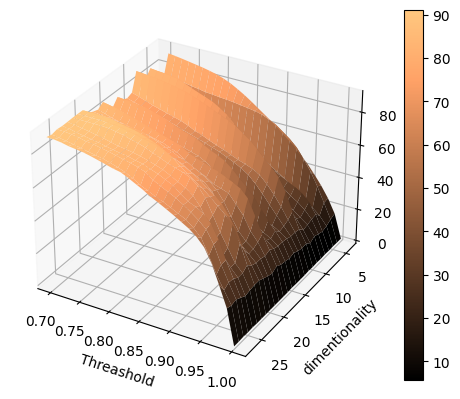

In [23]:
#this is the plot
#threashold_result2= threashold_result[::-1]
#print(threashold_result)
#ave_edges_log=np.log(ave_edges)

print(len(threashold_result))
print(len(ave_edges))
print(len(my_dimention[1]))
y = np.array(my_dimention[1])
x = np.array(threashold_result)#[::-1])
z = np.array(ave_edges)

X, Y = np.meshgrid(x,y)
#Z = np.tile(z, (len(y), 1))
Z = np.reshape(z, (len(x), len(y)))
print(Z[0])
print(Z[-3])
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, cmap = 'copper')
#ax.view_init(azim=45)
ax.set_xlabel('Threashold')
ax.set_ylabel('dimentionality')
ax.set_zlabel('Average edges')

ax.set_ylim(28,3)
#ax.set_xlim(28,3)
fig.colorbar(surf)
plt.show()

